In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("human_data.csv")

In [ ]:
df

In [21]:
df = df.drop("Unnamed: 0",axis=1)

In [22]:
df

,gender,age,income,career,dec,attr,sinc,intel,fun,amb,like
0,0,21.0,69487.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,7.0
1,0,21.0,69487.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,7.0
2,0,21.0,69487.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0
3,0,21.0,69487.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,7.0
4,0,21.0,69487.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
7035,1,25.0,NaN,assistant master of the universe (otherwise it...,0,2.0,7.0,6.0,6.0,6.0,5.0
7036,1,25.0,NaN,assistant master of the universe (otherwise it...,0,3.0,4.0,6.0,4.0,4.0,4.0
7037,1,25.0,NaN,assistant master of the universe (otherwise it...,0,3.0,3.0,9.0,6.0,9.0,6.0
7038,1,25.0,NaN,assistant master of the universe (otherwise it...,0,2.0,7.0,9.0,8.0,7.0,6.0


In [59]:
isnull = df["like"].isna().any()#age and like
print(isnull)

True


In [22]:
df[["income","age","like"]] = df[["income","age","like"]].apply(lambda x: x.fillna(x.median()))

In [23]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [64]:
df

,gender,age,income,career,dec,attr,sinc,intel,fun,amb,like
0,0,21.0,69487.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,7.0
1,0,21.0,69487.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,7.0
2,0,21.0,69487.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0
3,0,21.0,69487.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,7.0
4,0,21.0,69487.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
7035,1,25.0,45017.0,assistant master of the universe (otherwise it...,0,2.0,7.0,6.0,6.0,6.0,5.0
7036,1,25.0,45017.0,assistant master of the universe (otherwise it...,0,3.0,4.0,6.0,4.0,4.0,4.0
7037,1,25.0,45017.0,assistant master of the universe (otherwise it...,0,3.0,3.0,9.0,6.0,9.0,6.0
7038,1,25.0,45017.0,assistant master of the universe (otherwise it...,0,2.0,7.0,9.0,8.0,7.0,6.0


In [23]:
import sklearn

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_x,test_x,train_y,test_y = train_test_split(df.drop(["like","career"],axis=1),df["like"],test_size=0.2,random_state=1)


In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error#accuracy_score does not support continuous


In [27]:
decision = SVR(kernel = 'rbf',C=100,gamma=1).fit(train_x,train_y)
predicted = decision.predict(test_x)
score = np.sqrt(mean_squared_error(test_y,predicted))
print(score)

1.6714456930087367


In [51]:
from sklearn.svm import SVC
threshold = df["like"].median()
df["matched"] = df["like"] > threshold
x = df[["attr","fun"]]
y = df["matched"]
check = SVC(kernel='rbf',C=1,gamma=0.5).fit(x,y)

In [11]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [52]:
xx, yy = np.meshgrid(np.linspace(x["attr"].min() - 1, x["attr"].max() + 1, 150), np.linspace(x["fun"].min() - 1, x["fun"].max() + 1, 150))

In [53]:
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['attr', 'fun'])

In [54]:
z = check.predict(grid).reshape(xx.shape)

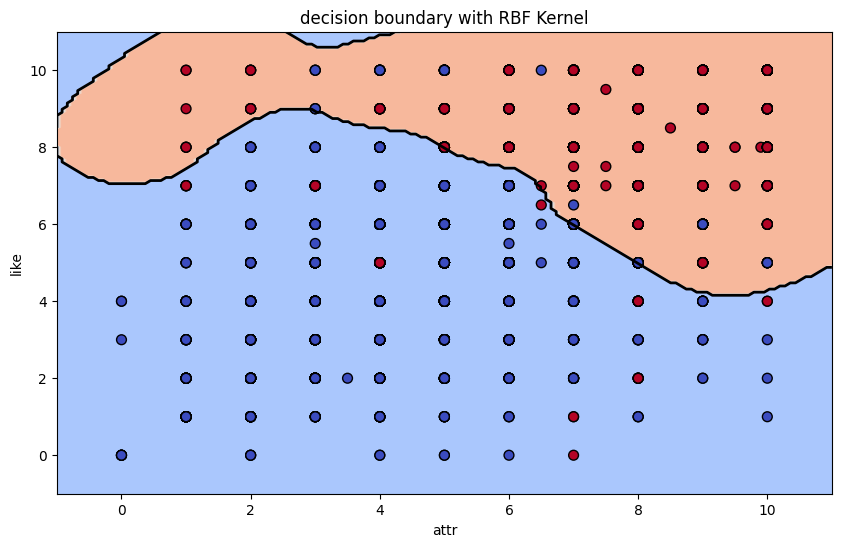

In [55]:
plt.figure(figsize=(10,6))
plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='black')
plt.contourf(xx, yy, z, levels=np.linspace(z.min()-1, z.max()+1,150) , cmap='coolwarm', alpha=1.0)
plt.scatter(x['attr'], x['fun'], c=y, edgecolor='k', s=50, cmap='coolwarm')
plt.xlabel('attr')
plt.ylabel('like')
plt.title('decision boundary with RBF Kernel')
plt.show()